# 4.6. Writing Python Functions

## Lets Discuss
### Terminology: `functions` vs `methods` vs `objects` vs `libraries/package` vs `modules` ....


- `package`: collection of python modules with a certain specific scope. It can also be installed (e.g. `pip install pandas`)
    - e.g. `pandas`: provides pd.DataFrame, pd.Series,  pd.DataFrame(), `sklearn`, `BeautifulSoup`

In [ ]:
##example of sklearn, __file__, 

In [1]:
import sklearn

In [2]:
print(sklearn.__file__)

/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/__init__.py


In [3]:
from sklearn.impute import SimpleImputer # <- class included in sklearn, that we can use to impute Na values in a simple way

In [4]:
si = SimpleImputer()

In [5]:
type(si) 

sklearn.impute._base.SimpleImputer

In [6]:
import numpy as np
x = [1,2,np.nan,4]
x = np.reshape(x,(4,1))

In [7]:
si.fit_transform(x) # <- fit is a function, and functions belonging to cetrain classes are called methods

array([[1.        ],
       [2.        ],
       [2.33333333],
       [4.        ]])

### Q. Why should we use functions? 

- Don't repeat yourself, avoid repetition
- Use and reuse 
- Functions allow complex problems to be broken into smaller piecies
- combine them
- decrease a mental load for the coder and the reader

#### In programming, a function is a self-contained block of code that performs a specific task or related group of tasks.

## 1. How to write functions

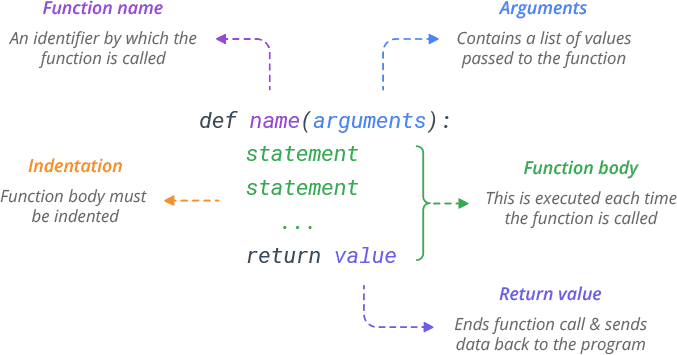


* A function should have a single purpose
* You start with the def keyword
* This is followed by the function_name in lower case with underscores
* Followed by parentheses () and a colon :
* After the : you need to indent the code of the function
* The indented part, the function definition, recommended to include a docstring describing what the function does
* Parameters of a function are defined in the ()
* One or more return statements (but not mandatory)

### 1.1 Arguments

In [30]:
 def fruits(quantity, fruit, price):
    #print(f'{quantity} {fruit} cost ${price:.3f}')
    print(1)

In [31]:
fruits()

TypeError: fruits() missing 3 required positional arguments: 'quantity', 'fruit', and 'price'

In [10]:
fruits(5, '😁', 5)    #arguments passed to a function in correct positional order.

5 😁 cost $5.000


The parameters (quantity, fruit, and price) behave like variables that are defined locally to the function. When the function is called, the arguments that are passed (5, '🍏', and 5) are assiggned to the parameters. 
Be careful about order and number of arguments that you are passing.

In [ ]:
fruits(quantity=1, fruit='🍏', price=1) #keyword argument

In [16]:
a = 5 
def fruits(quantity=1, fruit='🍌', price=2*a):       #default argument
    print(f'{quantity} {fruit} cost ${price:.2f}')

In [17]:
fruits()

1 🍌 cost $10.00


In [15]:
fruits(2, '🍓')

2 🍓 cost $0.50


### 2. Docstring


* Gives information about the function

In [18]:
 def fruits(quantity, fruit, price):
    """
    my first doc string
              
     price - should be integer
    returns price of the fruit:
    """
        
    print(f'{quantity} {fruit} cost ${price:.4f}')     

In [19]:
fruits(1, '🍊', 2)

1 🍊 cost $2.0000


In [22]:
fruits??

### What makes a good function?
- Correct syntax, else nothing works
- Important to comment/document what the function is doing
    - ''' ...''' `docstring`: gives a description of the function: https://www.python.org/dev/peps/pep-0257/#specification
        - what it does
        - the paratemers
        - the returns
    - good **names**: for the function and its variables
- Single purpose: 5-20 lines
- Often have *parameters*, should be intuitively named

### `*args` and `**kwargs`
parameters you don't define until you call the function --> give you flexibility to pass many arguments
- **args**: per covention *args, they don't have a variable definition , list for additional unnamed parameters
- **kwargs**: per convention **kwargs, keyworded arguments, with declared variable defintion (when you call the function), - dict for additional named parameters



In [49]:
def show_args_types(*args):
    for arg in args:
        print(f'{arg} is a {type(arg)}')

In [50]:
show_args_types(6, 'ordinal-oreganos', 7.222, si, 'Everybody is great', [1,2,3,4], {'we': 'ordinal-oreganos'})

6 is a <class 'int'>
ordinal-oreganos is a <class 'str'>
7.222 is a <class 'float'>
SimpleImputer() is a <class 'sklearn.impute._base.SimpleImputer'>
Everybody is great is a <class 'str'>
[1, 2, 3, 4] is a <class 'list'>
{'we': 'ordinal-oreganos'} is a <class 'dict'>


In [51]:
show_args_types('Arjun')

Arjun is a <class 'str'>


In [52]:
show_args_types(name = 'Arjun')

TypeError: show_args_types() got an unexpected keyword argument 'name'

In [61]:
def show_args_and_kwargs_types_nicely(*args, **kwargs):
    for arg in args:
        print(f'{arg} is a {type(arg)}\n') # this is an f string
    for kwarg in kwargs:
        print(f'{kwarg} is a kwarg and is a {type(kwarg)}\n')

In [62]:
show_args_and_kwargs_types_nicely(name = 'Arjun')

name is a kwarg and is a <class 'str'>



In [63]:
show_args_and_kwargs_types_nicely(6,name = 'Arjun')

6 is a <class 'int'>

name is a kwarg and is a <class 'str'>



In [ ]:
show_args_and_kwargs_types_nicely(name = 'Arjun')

---> `args` before `kwargs`!

In [58]:
show_args_and_kwargs_types_nicely(6, [1,2,3,4], name = "Arjun", x = 6)

6 is a <class 'int'>

[1, 2, 3, 4] is a <class 'list'>

name is a kwarg and is a <class 'str'>

x is a kwarg and is a <class 'str'>



They don't have to be called `*args` and `**kwargs`, you could call them `*artists`

In [59]:
def find_song_links(*artists):
    for artist in artists:
        ## put all the code to extract links
        print(f'Found links for {artist}')

In [60]:
find_song_links('Abba', 'Roxette')

Found links for Abba
Found links for Roxette


### Which functions could be useful for this week?

Some examples:
- `find_valid_artist_name` in lyrics.com (e.g. "Onerepublic" but not "One Republic")
- `find_song_links` given artist
- `dowload_songs` given list of song links
- `fit model` with given corpus, includes the feature engineering step of tfidfvec
- `predict_new_song` give new text, includes transform for new text to predict

In [64]:
import requests
requests.get('https://www.lyrics.com/dasd')

<Response [404]>